In [8]:
import os
import itertools as it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py 
import os
import itertools
import re
import functools
import operator 
from sklearn.preprocessing import scale
save_load_path = '/Users/mikebrennan/Dropbox/MA755 Public (3)/pynotes/Michael-Nick'
##save_load_path = '/Users/mydlo_nich/Dropbox/MA755 Public (3)/pynotes/Michael-Nick'
mss_df = pd.read_pickle(save_load_path+'/team_data_set.pkl')
pd.set_option("display.max_rows",101)
pd.set_option("display.max_columns",101)
%matplotlib inline


In [36]:
#This line imports the data necessary to support this %notebook
%run data_load.py

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [1]:
#This line imports the functions necessary to support this notebook.
%run team_functions2.py

In [15]:
##mss_df=pd.read_pickle('/Users/mydlo_nich/Dropbox/MA755 Public (3)/pynotes/Michael-Nick/team_data_set.pkl')
##to_cluster=mss_df[list(mss_df.columns[21:36]) + list(mss_df.columns[37:39]) + list(mss_df.columns[53:])]
##to_cluster.ix[:,:'tim_comp_14'].max()

## Project Overview.
90% of this project was spent on data exploration.  Taken at face value, the data within the data set can not necessarily be used to "define" a song.  Instead, we found it necessary to begin diving deeper into the data and mining it for more interesting variables which could be used for the dataframe.  Thus, this project will be broken into two pieces.  First, we will discuss the methods for gathering data (notebooks FP1 - FP4) and second the actual modeling techniques applied to that data and the associated results (FP5 - FP6).

- - -
# Start Data Gathering
## Notebook FP1: Reducing Timbre values using PCA
Every song in the data set contains a 12 x N matrix containing a measure of "timbre" for each segment in a given song (where N is the number of segments).  Each song has a different number of segments.  Given each song has a different number of segments, it makes it very difficult to compare timbre measures between different songs.  Therefore, principle component analysis was used to reduce the Timbre measures down to just 15 components.  We found that if we looked at only the first 3 (of 12) measures of timbre we could reduce the first 200 measure of Timbre down to just 13 components.  In short, we were able to compress 600 variables (200 segments * 3 measures of timbre) for each song down to just 15 principle components and still retain 68% of the variance (see Notebook FP1 for details).

### Functions written in support of Notebook FP1
Function   | Input | Output  
-------------  | ------------- | ------------- 
PCF | matrix or dataframe | Eign Values and Eign Vectors resulting from PCA on the provided Dataframe
var_explained | Output from PCF plus an integer i | Amount of variance explained by the first i Eign Vectors


### Variables derived from Notebook FP1
Variable   | Description | Min   | Max | Mean
-------------  | ------------- | ------------- |  ------------- | ------------- 
tim_comp_0 | 1st Principle Component of Timbre |-2453.864338|2231.082669|-412.261987
tim_comp_1 | 2nd Principle Component of Timbre |-3778.743748|2878.922603|-223.012229
tim_comp_2 | 3rd Principle Component of Timbre |-3217.324922|2858.442991|-348.491622
tim_comp_3 | 4th Principle Component of Timbre |-1264.086774|2184.080956|25.528833
tim_comp_4 | 5th Principle Component of Timbre |-1116.887562|1398.648472|12.812318
tim_comp_5 | 6th Principle Component of Timbre |-1117.775716|1718.975473|38.795812
tim_comp_6 | 7th Principle Component of Timbre |-995.329949|923.700481|31.505048
tim_comp_7 | 8th Principle Component of Timbre |-655.859957|751.050687|14.791298
tim_comp_8 | 9th Principle Component of Timbre |-1425.038566|850.853524|-6.312468
tim_comp_9 | 10th Principle Component of Timbre |-868.978906|731.306845|13.506516
tim_comp_10 | 11th Principle Component of Timbre |-659.714829|742.109971|-20.043865
tim_comp_11 | 12th Principle Component of Timbre |-594.989389|727.511071|8.612220
tim_comp_12 | 13th Principle Component of Timbre |-672.999753|1227.958064|12.332765
tim_comp_13 | 14th Principle Component of Timbre |-572.008437|499.842040|-3.180530
tim_comp_14 | 15th Principle Component of Timbre |-506.264971|701.645783|-6.616080

### The process


To begin PCA we first created a dataframe which contained the first 200 segments of Timbre for the all 12 measures of timbre (2400 columns) for each song.  Note, not all songs contain 200 segments of data.  So, the data was reduced to only contain the 9,552 songs which contain Timbre data.  The data looks as follows:

In [31]:
timbre_dataframe.head(2)

at_0                at_1           at_2  st_0    st_1    st_2  \
0         b'hip hop'  b'underground rap'      b'g funk'     0  19.991  20.597   
0  b'blue-eyed soul'         b'pop rock'  b'blues-rock'     0  35.141  42.317   

     st_3    st_4    st_5    st_6    st_7    st_8    st_9   st_10   st_11  \
0  20.908  22.173  32.381  29.165  30.153  31.814  33.914  31.996  34.283   
0  37.802  39.138  37.612  42.706  38.668  36.981  37.551  44.953  36.050   

    st_12   st_13   st_14   st_15   st_16   st_17   st_18   st_19   st_20  \
0  34.262  31.702  28.614  20.417  23.222  28.465  28.091  22.179  20.860   
0  44.449  44.439  42.781  45.514  40.634  45.279  41.301  40.247  38.791   

    st_21   st_22   st_23   st_24   st_25   st_26   st_27   st_28   st_29  \
0  28.455  30.931  25.575  16.792  29.887  33.842  34.111  44.810  35.352   
0  43.227  40.527  39.253  37.940  42.761  41.217  42.184  42.621  40.267   

    st_30   st_31   st_32   st_33   st_34   st_35   st_36   st_37   st_38  \
0  34.928  36.654  36.731  40.561  37.258  34.820  32.867  28.395  42.926   
0  40.137  36.322  40.030  39.475  41.111  42.966  42.689  44.843  43.805   

    st_39   st_40   st_41   st_42   st_43   st_44   st_45   st_46   ...     \
0  44.759  46.177  45.248  42.784  35.010  32.075  42.870  46.744   ...      
0  45.310  42.998  39.790  43.307  44.565  45.972  45.006  44.462   ...      

   st_2351  st_2352  st_2353  st_2354  st_2355  st_2356  st_2357  st_2358  \
0   -7.909   -6.991   15.730    9.598   25.218  -22.123    1.951  -21.855   
0   13.914   27.935   -3.338   12.715   -2.629    7.295   17.332   -4.767   

   st_2359  st_2360  st_2361  st_2362  st_2363  st_2364  st_2365  st_2366  \
0    0.591   -3.794    3.042   13.336   12.533    4.906   32.838   -7.965   
0   13.881    5.962   -0.142   11.360    9.564    9.685   15.079   -3.144   

   st_2367  st_2368  st_2369  st_2370  st_2371  st_2372  st_2373  st_2374  \
0  -36.980   -5.558  -17.772   36.917   11.336   26.026   66.213  -27.212   
0   -4.207   17.950   11.871    8.181  -15.227   -2.700   -6.592  -13.527   

   st_2375  st_2376  st_2377  st_2378  st_2379  st_2380  st_2381  st_2382  \
0   18.392   12.887   49.712  -23.852   15.850   -0.859   12.913  -13.154   
0    4.441    5.605   -5.515    3.003    4.757  -10.611   24.817    0.197   

   st_2383  st_2384  st_2385  st_2386  st_2387  st_2388  st_2389  st_2390  \
0   12.255  -17.799   14.307   -1.631  -20.759  -12.009    5.785    0.193   
0   -2.629   -2.325  -13.721  -17.841    4.551  -15.061    3.968    4.931   

   st_2391  st_2392  st_2393  st_2394  st_2395  st_2396  st_2397  st_2398  \
0  -10.177   24.202    4.186   -2.245   -6.649    4.914    9.595  -13.901   
0   24.051   19.442   26.006   14.434    1.697  -21.117  -12.532    3.478   

   st_2399  song_id  
0  -16.490        0  
0    7.116        1  

[2 rows x 2404 columns]

We than decided to run PCA on each of the 12 measures of Timbre individually to see how well they could be reduced.  The master dataframe was reduced into a list of Dataframes (titled Timbre).  For example: Timbre[0] contains the first 200 segments of the first measure of Timbre for all songs.  PCA was executed on each individual measure of Timbre below.

### Results
The following plots show just how well PCA worked against each of the 12 measures of Timbre.  The Y-axis shows % of variance explained and the X-axis shows the # of principle components used.  For example. plot 1 (Timbre measure 1) shows that very few components are required to explain nearly 80% of the variance.  However, the plot in the lower left (timbre component 10) is much more linear.  Meaning that it was very difficult to reduce this Timbre measure using PCA.

### Key Takeaway
Timbre measures 1, 2, and 3 responded the <b>best</b> to PCA reduction.


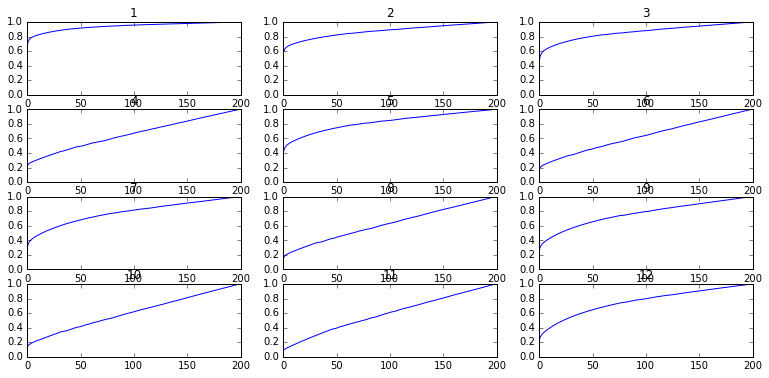

In [32]:
E=[]
for i in range(0,12):
    E.append(pcf(timbre[i]))
    
fig = plt.figure(1, figsize=(13,6))
for i in np.arange(12):
    plt.subplot(4,3,i+1)
    plt.plot([var_explained(E[i],x) for x in list(range(1,200))])
    plt.ylim(ymax = 1, ymin = 0)
    plt.title(i+1)

The plots above show the first 3 measure of Timbre seem to be the ones which are reduced the most by using PCA.  The code block below shows we are able to retain 68.9% of the variance of the original 600 columns using only 15 Principle Components.  A huge reduction in dimensions.  Thus, our final data set will contain 15 components of Timbre which represent the first 200 segments of the 1st/2nd/3rd measures of Timbre.

In [34]:
timbre_1_2_3=(timbre_dataframe.ix[:,3:603])
E2=pcf(timbre_1_2_3)
var_explained(E2,15)

0.68865208030786285

Finally, the code below takes the Eign vector results from the PCA and converts them into 15 individual components.  These are added to our final data frame.

In [35]:
component_list=[]
for i in range(len(timbre_1_2_3)):
    Comp=[]
    source=timbre_1_2_3.iloc[i]
    for j in range(0,15):
        Comp.append(np.dot(source,E2[j][1]))
    component_list.append(Comp)
tim_df=pd.DataFrame(component_list, columns=var_list('tim_comp_',15))
print(tim_df.shape)
tim_df.head()


(9552, 15)


tim_comp_0   tim_comp_1  tim_comp_2  tim_comp_3  tim_comp_4  tim_comp_5  \
0 -567.682577   147.664203 -339.192207 -554.155393  -43.886136 -503.389146   
1 -426.597316  -403.199195 -337.360209  -41.048973  -20.271638  -34.718046   
2  -64.802953 -1146.409999 -600.498833  215.668447   36.408786  183.837237   
3 -922.796743  -651.817408  324.914535   49.357092  -36.502033   50.429332   
4 -744.210501  -333.304990  -65.009973 -347.351662 -322.512785   91.695531   

   tim_comp_6  tim_comp_7  tim_comp_8  tim_comp_9  tim_comp_10  tim_comp_11  \
0 -101.305289 -205.727265   60.576452  -33.136826     7.785124    63.447632   
1  -38.285278   93.569841   87.339023  -47.498931    21.051709   -94.022645   
2   13.173252   87.954370   22.416583   39.733235    -2.457589   -35.811513   
3   36.231150  -42.645043    2.982978  166.385512    -7.049662    62.155778   
4  127.889116   42.358802   10.011409  -88.682259   -78.130060   -55.528248   

   tim_comp_12  tim_comp_13  tim_comp_14  
0   -10.015682   -14.503595    33.596925  
1    80.848612    82.302616   -41.181983  
2    63.243426    70.074740   -17.469580  
3    39.160533    69.148130   -58.329949  
4    45.142637  -106.970837    23.810118

- - -
## Notebook FP2: Converting Pitches from Segment to Time
We initially desired to use data within the 12xN pitch matrix to detect songs which may or may not be similar to each other.  However, pitches in the data set are measured by segment and not by time.  Segments are not consistent in time period across the data set.  They actually range from 0.06 seconds to 962 seconds with an average of 0.27 seconds.  Therefore, we deemed it necessary to write code to convert the pitch matrix from segments to time.  

Note, the very long segments (those which are hundreds of seconds long) actually represent periods in songs where pitch data is missing.  For example, there may be a case where the segment start time of a given segment may be "10" and the next segment start time may be "100."  In these cases the code detects this as a 90 second long segment.  However, in reality, it is just a song which is missing pitch measure for those 90 seconds.

### Functions written in support of Notebook FP2
Function   | Input | Output  
-------------  | ------------- | ------------- 
get_pitch | song_id | 12xN Pitch Matrix for the row associated with song_id
get_segments | song_id | N length array of Segment Start times associated with song_id
get_durations | segment start times | N-1 length array of Segment Durations associated with segment start times.
segment_convert | segment durations plus time_slice | A weighted conversion table to convert slice segments into evenly spaced durations equal to `time_slice` seconds.
time_convert | Segment Conversion Table (from `segment_conver`) plus Pitch matrix (from `get_pitch`) | A revised pitch matrix of pitch values measured every `time_slice` seconds.

### Variables derived from Notebook FP2
No variables were derived directly from Notebook FP2.  Instead, this framework was used to derived variables in notebook FP3.

### The Process
The code below shows the process involved in converting the Pitch and Timbre data for song 0 from Segment to Time


In [42]:
#Get the segment start times for Song 0
segments=get_segments(0)
#Convert them to durations
dur = get_durations(segments)
#Get the pitch data
pit = get_pitch(0)
#Get the timbre data
tim = get_timbre(0)
#Generate a conversion table for intervals of 0.1s
c=segment_convert(dur, 0.1)
#Convert the pitches
pit_converted = time_convert(c,pit)
tim_converted = time_convert(c,tim)

The objects `pit_converted` and `tim_converted` now contain time-domain version of Pitch and Timbre.  The plots below place them side-by-side

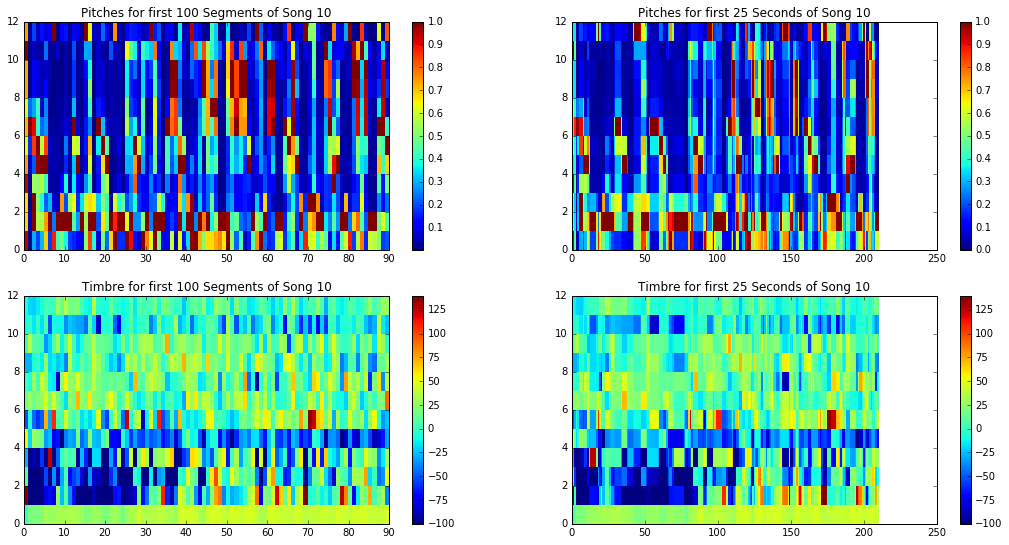

In [43]:
#First 90 segments = First 25 seconds
fig = plt.figure(1, figsize=(18,9))
plt.subplot(2,2,1)
plt.pcolor(pd.DataFrame(pit[0:90]).transpose())
plt.colorbar()
plt.title('Pitches for first 100 Segments of Song 10')

plt.subplot(2,2,2)
plt.pcolor(pit_converted.iloc[0:210].transpose(),vmin=0,vmax=1)
plt.colorbar()
plt.title('Pitches for first 25 Seconds of Song 10')


plt.subplot(2,2,3)
plt.pcolor(pd.DataFrame(tim[0:90]).transpose(),vmin=-100,vmax=140)
plt.colorbar()
plt.title('Timbre for first 100 Segments of Song 10')


plt.subplot(2,2,4)
plt.pcolor(tim_converted.iloc[0:210].transpose(),vmin=-100,vmax=140)
plt.colorbar()
plt.title('Timbre for first 25 Seconds of Song 10')

Note that in the time-domain plot of pitch on the upper right that some periods of pitch seem to be compressed and shorter than they appear on the left.  This is because the pitch data now captures aspects of time and picks up on faster and slower sections of the song.

- - -
## Notebook FP3: Extracting Common Pitch Patterns and Song Structure.
Code for this section was based upon code from the following site: 
http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html


In this notebook we use the framework from FP2 to extract data elements out of the Pitch Matrix which represent overall song structure.  In short, the following process was executed against each song in the data set.
* Convert the Pitch Matrix of a given song from segments to time with intervals of 0.25s.
* Within that revised pitch matrix, find the most common 10 second pitch pattern in the song (i.e., the one which repeats the most often).
* Save that "pitch pattern" as the defining pitch measure for a given song.
* Record a `repeat_score` indicating how often that pattern occurs in the song (a lower repeat score indicates that the most common pattern shows up more often than a high repeat score)

The most common pitch pattern in a song was identified by slicing the song into 10 second intervals.  In turn, this created a number of 12 x 40 matrices for each song.  The 12 rows represent the 12 measures of pitch and the 40 columns represent the first 10 seconds of the song measured at 0.25s intervals.  Each of these pitch patterns for a given song were then overlaid on top of the original pitch matrix for a song and a distance measure was captured at every point in time.  For example, a pitch pattern would be compared to seconds 0-10 of a song, and then seconds 1-11 and then 2-12, and so on.  The sum of those distances was recorded and the pitch pattern with the LOWEST sum was deemed to be the one which was the most common pattern in the song.

Furthermore, these distance measures provide additional insight into song structure.  When plotted over time, the distance measures of the most common pitch pattern in a song form what appears to be a signal with frequency changes over time.  These frequency changes actually represent structural changes within a song.  We then used a Fourier transform to identify how often these changes occur (and how strong those frequencies were) and used those as variables in our dataframe representing song structure.

Finally, in order to convert the most common pitch pattern for a song into usable variables for a dataframe, we simply took the variance of each of the 12 pitch measures.  This provided a measure of the pitches present in the most common pattern of each song.  


### Functions written in support of Notebook FP3
Function   | Input | Output  
-------------  | ------------- | ------------- 
convert_pitch | song_id, timeslice | Consolidates the process from FP2 into a single function.  Converts the pitch matrix of `song_id` from segments into intervals equal to `timeslice` seconds.
distance | matrix1, matrix2 | Euclidian distance between two provided matrices
find_repeats | song, timeslice, pitch_window | Returns the most common pitch pattern of length = `pitch_window` seconds and related distance measures for the provided `song` measured in intervals of `timeslice` seconds.
fourier | `song` | executes a fourier transform against a the distance measures provided out of `find_repeats`.  Note, requires that all the distance measures are stored into a data frame called `m_patterns`.  (We retained this data as a PKL file)


### Variables derived from Notebook FP3
Variable   | Description | Min   | Max | Mean
-------------  | ------------- | ------------- |  ------------- | ------------- 
max_segment | Max length (in seconds) of segment |0.266890|962.422090|2.413097
mean_segment | Average length (in seconds) of segment | ||
repeat_score | Measure of repetition within a song |0.490155|2.114240|1.640270
f1 | Time (in seconds) most common feature of song repeats |2.010929|395.500000|32.935032
f2 | Time (in seconds) 2nd most common feature of song repeats |2.006993|422.000000|13.747287
f3 | Time (in seconds) 3rd most common feature of song repeats |2.009346|454.000000|8.863422
s1 | Relative measure of strength of F1 |0.022552|11.018936|0.290514
s2 | Relative measure of strength of F2 |0.001870|10.850663|0.121888
s3 | Relative measure of strength of F3 |0.000858|10.794580|0.071535
c1_var | Variance 1st note in most common pitch pattern |0.000000|0.218447|0.045439
c2_var | Variance 2nd note in most common pitch pattern |0.000000|0.199569|0.041281
c3_var | Variance 3rd note in most common pitch pattern |0.000000|0.236701|0.042771
c4_var | Variance 4th note in most common pitch pattern |0.000000|0.211707|0.030452
c5_var | Variance 5th note in most common pitch pattern |0.000000|0.202428|0.039350
c6_var | Variance 6th note in most common pitch pattern |0.000000|0.213961|0.036243
c7_var | Variance 7th note in most common pitch pattern |0.000000|0.197048|0.033603
c8_var | Variance 8th note in most common pitch pattern |0.000000|0.220560|0.043417
c9_var | Variance 9th note in most common pitch pattern |0.000000|0.230700|0.032850
c10_var | Variance 10th note in most common pitch pattern |0.000000|0.219368|0.042909
c11_var | Variance 11th note in most common pitch pattern |0.000000|0.212514|0.032646
c12_var | Variance 12th note in most common pitch pattern |0.000000|0.214438|0.040117

### The Process
Let us look into the full end-to-end process of this data gathering on one specific song. (Song #50).  The code below plots the pitches (in the time domain) for song #50. Note we can see two patterns in the song.  
* We see an repeated up-down-up-down-up-down micro-pattern between notes 4 and 12.  
* We wee a repeated macro-pattern where that 4/12 pattern disappears and is replaced by something different.  (Note the time periods around 170-200, 250-300, 400-475, etc.)

<b>Can we detect this???</b>


b'Human BeingToo Much Too Soon'

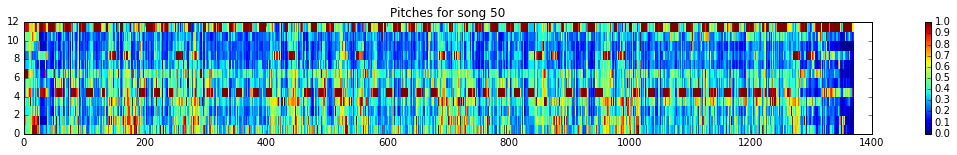

In [44]:
a=convert_pitch(50,0.25)
fig = plt.figure(1, figsize=(19,2))
plt.title('Pitches for song 50')
plt.pcolor(a.transpose(),vmin=0,vmax=1)
plt.colorbar()
mss_df.iloc[50]['title']+mss_df.iloc[50]['release']

In attempt to detect the 4/12 micro-level pattern as well as the secondary marco-level pattern, we use the "find_repeats" function.

50
b'Human Being'
b'Too Much Too Soon'


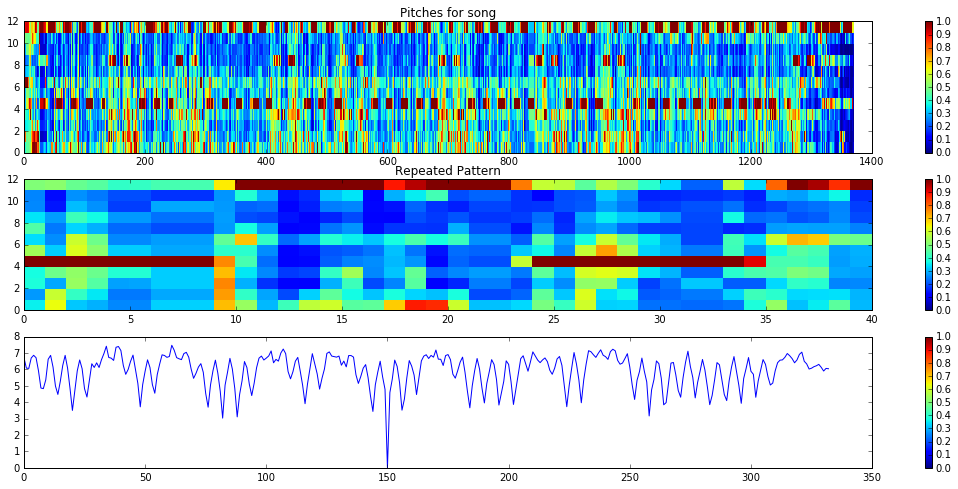

In [47]:
a=find_repeats(50,0.25,10,"print")

### The Output

* Plot 1: Pitch matrix of Song 50.
* Plot 2: The **Most Common** 10 second pitch pattern in the song.
* Plot 3: A *Distance Plot*.  It shows the Euclidian Distance between the most common Pitch Pattern and the underlying song at every point in time.

The second plot shows the most common 10-second pitch pattern in the song.  We can see that it did property detect the up/down pattern between notes 4 and 12.  In addition, the frequency-like plot on the bottom shows us where that repeated pattern occurs in the song.  In this plot we can see the structure of the song.  We see a high-frequency signal indicating the presence of the pitch pattern as well as changed where that high-frequency signal disappears. This is where something else is happening within the song.

We can use a <b>Fourier Transform</b> to detect the frequency of these underlying structural changes within the song.


[[0.36871141934195045, 36.666666666666671],
 [0.33833385610209049, 6.2264150943396226],
 [0.095751643437287412, 2.1153846153846154]]

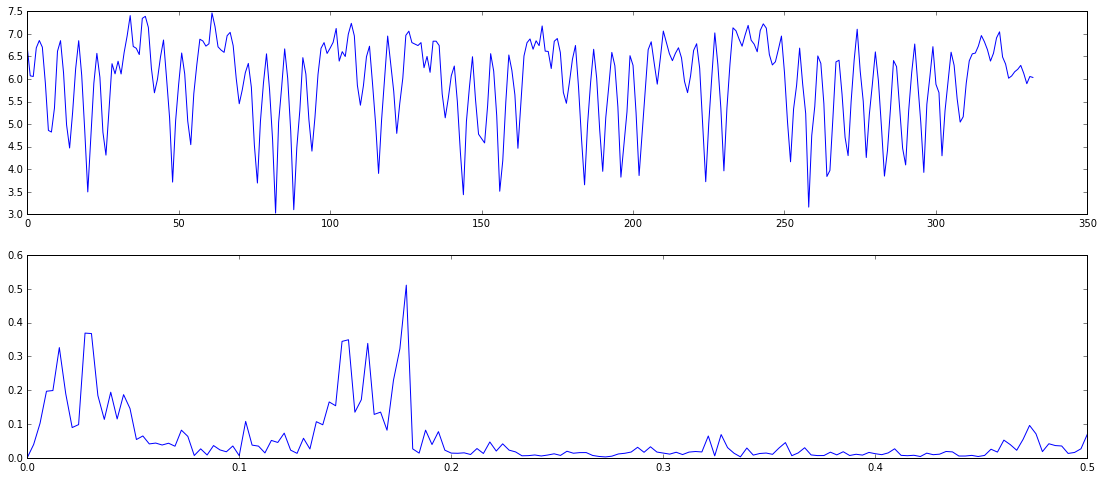

In [54]:
fourier(50,True)

### What does this output tell us?
The output vectors at the top tell us the most common structural frequencies in the song and how strong they are.  For example, in this song we have:
* A structure which repeats every 36.6 seconds
* A second structure which repeats every 6.22 seconds.
* A third (very weak) structure which repeats every 2.11 seconds.

The 2nd plot was the signal we input into the function and the last plot is the result of the Fourier transform of that signal.  In a Fourier transform you see "spikes" at the various frequencies which are prevalent in the data.  In this case, we see three clusters of peaks, which correspond to the values listed above.


### These are our variables!
Freq1 | Strength1 | Freq2 | Strength2 | Freq3 | Strength3
---|---|---|---|---|---
36.6s | 0.368 | 6.22s | 0.338 |2.11 |0.09

### Song Stucture Overview.

The plots below show the frequency plots of the first 1000 songs.  We can see that some songs have some very clear and distinct patterns while others are a bit more random.  The frequency and strength variables described above will pick up on these patterns and allow us to group together songs which are similar in nature.


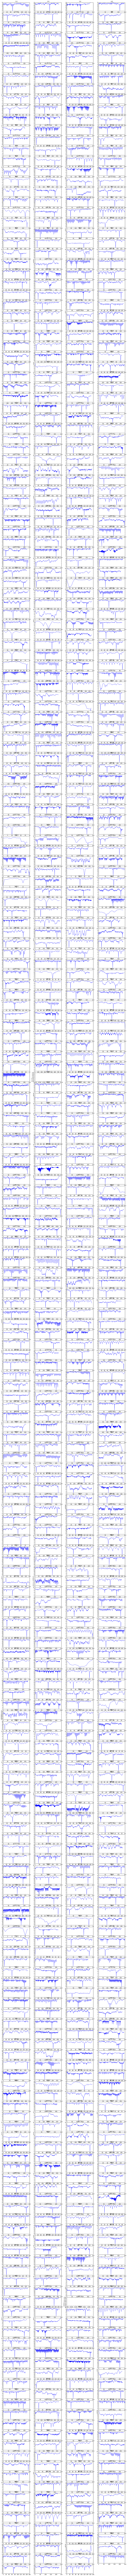

In [55]:
fig = plt.figure(1, figsize=(19,400))
for i in range(1,1000):
    plt.subplot(250,4,i)
    plt.plot(m_patterns.iloc[i][0:1676])
    plt.title(m_patterns.iloc[i]['song'])

- - -
## Notebook FP4: Extract Volume Information



### Functions written in support of Notebook FP4
Function   | Input | Output  
-------------  | ------------- | ------------- 
Loudness Difference  | List of Song Segment Max Loudness | Below
graph_raw_Exp | Array of Loudness Data | Plot of an Exponential Smoothing Line over the Raw Loudness Data



### Variables derived from Notebook FP4
Variable   | Description | Min   | Max | Mean
-------------  | ------------- | ------------- |  ------------- | ------------- 
loudness | Average Loudness of Song |-51.643000|0.565900|-10.284500
loudness_diff | Difference in Loudness between first and 2nd half of song |-20.239883|28.004761|1.046156
vol_f1 | Time (in seconds) most common volume change fluxuates |2.002353|1584.666667|179.883941
vol_f2 | Time (in seconds) 2nd most common volume change fluxuates |2.001114|1120.800000|25.222029
vol_f3 | Time (in seconds) 3rd most common volume change fluxuates |2.002451|926.000000|13.574778
vol_s1 | Relative measure of strength of vol_f1 |0.115658|10.489219|1.517782
vol_s2 | Relative measure of strength of vol_f2 |0.070992|4.002033|0.628711
vol_s3 | Relative measure of strength of vol_f3 |0.050586|3.589370|0.484866


### Deriving an Extra Measure for Use in our Modeling

The below script is a basic difference calculation for use in generating an addition variable, loudness_diff, which seeks to quantitatively capture the ramp up/down as a proxy for the build in loudness for a given song or set of songs. I used basic lists in lieu of numpy functionality for ease of implementation given the format our get_loudness function used.

In [2]:
loudness_avg1 = []
loudness_avg2 = []
loudness_diff = []

for song in range(10000):
    length_larray = len(loudness_list[song])
    ##print(length_larray)
    midpoint = round(length_larray/2)
    avg1 = 0
    count1 = 0
    count2 = 0
    avg2 = 0
    
    for l_seg in range(midpoint):
        avg1 = avg1 + loudness_list[song][l_seg]
        count1 = count1 + 1
    
    for l_seg in range(midpoint+1,length_larray):
        avg2 = avg2 + loudness_list[song][l_seg]
        count2 = count2 + 1
      
    avg1 = avg1/count1
    avg2 = avg2/count2
    
    loudness_diff.append([avg2-avg1,song])

In [3]:
loudness_diff[:10]
sorted(loudness_diff, reverse=False)[0:10]

[[-20.239883333333367, 3697],
 [-17.93915185185184, 8595],
 [-17.245831189710611, 8688],
 [-17.208028367575746, 7788],
 [-13.86553394607844, 6645],
 [-13.776357737615612, 8095],
 [-12.77279204204204, 4706],
 [-12.762063275341285, 5294],
 [-12.754648188600608, 3274],
 [-12.37260499283326, 1122]]

### Looking at the Results Visually

Here we ranked the songs based on their calculated "ramp" value and using our exponential smoothing function we can further get a better idea of what these song loudness segment time series look like.

Here we look at song 3274 because of it's position on the ranking list for loudness_diff. You can see that the trend in loudness is corroborated by the calculated value. Hopefully this adds an extra layer of potential differentiation for our modeling stage.

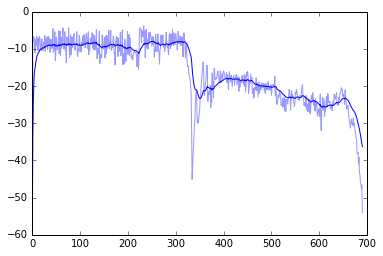

In [9]:
graph_raw_Exp(loudness_list[3274])

### We can also examine the loudness signal patterns if any 

Using Mike's Fourier Transform method, we are going to look at patterns in the loudness measures just as we are with pitch patterns. Perhaps we can generate more variables based on pattern timing and relative strength for our modeling methods.

In [10]:
def fourier2(a,plot):
    if len(a)<1:
        return([0,0],[0,0],[0,0])
    #a=a.iloc[0][~np.isnan(a.iloc[0])][0:-1]
    #a=a[a!=0]
    if len(a)<=10:
        return([0,0],[0,0],[0,0])
    #N = 600
    N = len(a)
    # sample spacing frequency
    T = 1.0
    x = np.linspace(0.0, N*T, N)
    y = signal.detrend(a)
    yf = fft(y)
    xf = np.linspace(0.0, T/(2.0*T), N/2)
    if plot==True:
        fig = plt.figure(1, figsize=(19,8))
        plt.subplot(2,1,1)
        plt.plot(a)
        plt.subplot(2,1,2)
        plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
    #return([xf,2.0/N*np.max(abs((yf[0:N/2])))])
    strength=(2.0/N*(np.abs((yf[0:N/2]))))
    p=(signal.find_peaks_cwt(strength, np.arange(1,20)))
    
    #strength_sort=sorted(strength)
    peak_strength=sorted(strength[p])
    #max_strength=max(strength)

    if len(peak_strength) >= 3:
        s1=peak_strength[-1]
        s2=peak_strength[-2]
        s3=peak_strength[-3]
    if len(peak_strength) == 2:
        s1=peak_strength[-1]
        s2=peak_strength[-2]
        s3=peak_strength[-2]
    if len(peak_strength) == 1:
        s1=peak_strength[-1]
        s2=peak_strength[-1]
        s3=peak_strength[-1]
    if len(peak_strength) == 0:
        return([0,0],[0,0],[0,0])
       
    freq=xf
    #max_freq=1/freq[strength==max_strength]
    f1=1/freq[strength==s1]
    f2=1/freq[strength==s2]
    f3=1/freq[strength==s3]
    
    #plt.plot(np.abs(yf))
    
  
    return[ [s1,f1[0]],[s2,f2[0]],[s3,f3[0]]]

/Users/mikebrennan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mikebrennan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[[1.4086640182726129, 242.0],
 [0.61288282493777979, 4.8643216080402008],
 [0.60404596495172846, 6.4533333333333331]]

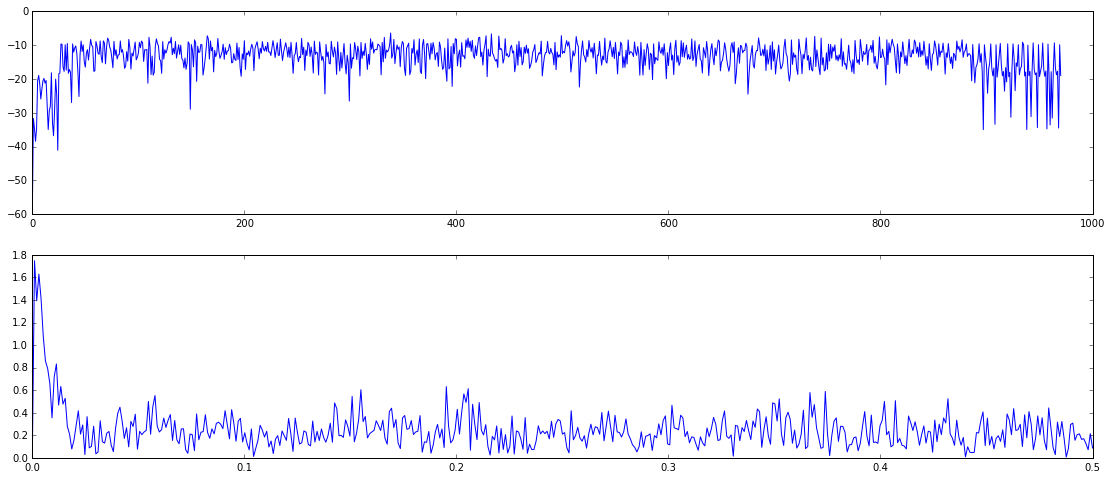

In [11]:
fourier2(loudness_list[0],True)

# End Data Gathering

- - -

# Begin Modeling
## Notebook FP5: Cluster Analysis



## Function Written

Function   | Input | Output  
-------------  | ------------- | ------------- 
form_clusters | data in form of array or sparse matrix | object that represents the Llyod's Algo Model for Clusters

## Let's Try and Cluster

We took and decided to run two different versions of K-means clustering on the modified data frame, to_cluster, which contains only the quantitative measures from our exploratory set. We would run clustering with a random initialization and one with a k-means++ iterative dynamic distribution sampling initialization.

### Random Initialization

In [23]:
silo_scores_random = []
sh_scores=[]
for i in range(1,5):
    sh_score = form_clusters(to_cluster,i+1,'random')
    sh_scores.append(sh_score)
    
no_clusters = [i+1 for i in range(1,5)]

[0 0 1 ..., 1 0 1]
[0 2 1 ..., 1 0 2]
[1 3 2 ..., 2 0 3]
[0 3 1 ..., 3 4 3]


In [26]:
no_clusters

[2, 3, 4, 5]

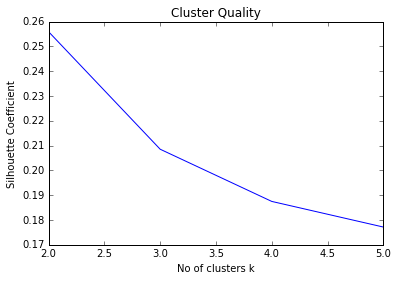

In [27]:
plt.figure(2)
plt.plot(no_clusters,sh_scores)
plt.title("Cluster Quality")
plt.xlabel("No of clusters k")
plt.ylabel("Silhouette Coefficient")
plt.show()

### K-means++ Initialization


In [33]:
silo_scores_kmeanplus = []
sh_scores=[]
for i in range(1,5):
    sh_score = form_clusters(to_cluster,i+1,'k-means++')
    sh_scores.append(sh_score)

[1 1 0 ..., 0 1 0]
[1 0 2 ..., 2 1 0]
[0 3 1 ..., 1 2 3]
[3 4 1 ..., 4 2 4]


In [34]:
no_clusters

[2, 3, 4, 5]

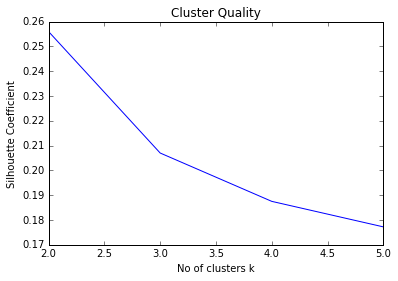

In [35]:
plt.figure(2)
plt.plot(no_clusters,sh_scores)
plt.title("Cluster Quality")
plt.xlabel("No of clusters k")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Clustering Doesn't Turn Out so Well

Just by looking at the graphs of Silhouette scores for each of the two initialization methods for K-means clustering, we can see that there is no point in further validating the members of each cluster. This is because the max efficacy rating as given by Silhouette shows that just two clusters provides our optimal solution. Given the scope of our exploratory dataframe, there is no feasible way just two clusters could provide any kind of granularity of seperation in the acoustic data.

This idea is further corroborated by Mike's use of a simple Euclidean distance algorithm in the following section to predict closest songs to a target song. His results match the disappointed one I found using K-means which makes sense given the Euclidean distance calculation inheirent in K-means.

## Notebook FP6: Distance Measures and Decision Trees
In this modeling approach we make two attempts.  The first is to identify similar songs to a chosen song using a Euclidian distance measure.  The second is to use a training set and a decision tree model to attempt to predict whether or not a person will like a given song. 


### Functions written in support of Notebook FP6
Note, code for this section was sourced from the course text.

Function   | Input | Output  
-------------  | ------------- | ------------- 
euc_distance | two vectors x and y | The Euclidian distance between the two vectors
song_distance | song_id | Given a single `song_id` this function returns a two column data frame.  The first column is the song_id for every song in the data set and the second column is the euclidian distance between each song and the `song_id` which was passed into the function.
get_train_test | Dataframe of Independent Variables and a Dataframe of the dependent variable | Training/test data sets split 80/20 and randomly sampled.
build_model | Dataframe of Independent Variables and a Dataframe of the dependent variable | A decision tree model attempting to predict the outcome Y given the variables X.
test_model | Dataframe of Independent Variables and a Dataframe of the dependent variable and a `model` object from `build_model` | Prints model accuracy, Confusion Matrix, and Classification Report for the model.


## Euclidian Distance
We start by reducing our dataframe to only include the numerical variables we wish to use for a distance calculation.  

In [37]:
to_cluster=mss_df[list(mss_df.columns[21:36]) + list(mss_df.columns[37:39]) + list(mss_df.columns[53:])]
to_cluster.head(3)

tim_comp_0   tim_comp_1  tim_comp_2  tim_comp_3  tim_comp_4  tim_comp_5  \
0 -567.682577   147.664203 -339.192207 -554.155393  -43.886136 -503.389146   
1 -426.597316  -403.199195 -337.360209  -41.048973  -20.271638  -34.718046   
2  -64.802953 -1146.409999 -600.498833  215.668447   36.408786  183.837237   

   tim_comp_6  tim_comp_7  tim_comp_8  tim_comp_9  tim_comp_10  tim_comp_11  \
0 -101.305289 -205.727265   60.576452  -33.136826     7.785124    63.447632   
1  -38.285278   93.569841   87.339023  -47.498931    21.051709   -94.022645   
2   13.173252   87.954370   22.416583   39.733235    -2.457589   -35.811513   

   tim_comp_12  tim_comp_13  tim_comp_14  pitch_length  max_segment        s1  \
0   -10.015682   -14.503595    33.596925           971      0.78041  0.260921   
1    80.848612    82.302616   -41.181983           550      0.54127  0.691640   
2    63.243426    70.074740   -17.469580           562      2.43850  0.121708   

         f1        s2         f2        s3         f3  repeat_score  \
0  4.204082  0.203081   2.607595  0.157180  34.333333      1.770378   
1  3.722222  0.259435  33.500000  0.234835  67.000000      1.482162   
2  2.352941  0.100500  22.857143  0.065489   4.571429      1.795608   

   loudness_diff    vol_s1      vol_f1    vol_s2     vol_f2    vol_s3  \
0      -0.353421  1.408664  242.000000  0.612883   4.864322  0.604046   
1      -1.067109  1.328457  109.600000  1.313144  16.606061  0.442925   
2      -0.653810  0.495874    2.413793  0.471537  40.000000  0.412664   

      vol_f3    c1_var    c2_var    c3_var    c4_var    c5_var    c6_var  \
0   6.453333  0.045620  0.063402  0.045679  0.036855  0.096425  0.027719   
1  10.538462  0.015116  0.043025  0.085240  0.012999  0.059987  0.013305   
2  15.555556  0.075382  0.041664  0.024358  0.132694  0.014635  0.034790   

     c7_var    c8_var    c9_var   c10_var   c11_var   c12_var  
0  0.026924  0.027746  0.103268  0.051895  0.035965  0.070962  
1  0.023651  0.003128  0.011939  0.092856  0.007192  0.058272  
2  0.015217  0.049511  0.016541  0.082187  0.108719  0.024884

### Step 1:  Normalize the data

In [38]:
scaled_data= scale(to_cluster, with_mean=True,with_std=True,axis=0)

### Step 2:  Measure "Distance" from target song to all songs
In this step we take a given target song and use `song_distance` to measure it's distance to every other song in the data set.

In [39]:
euc_distance = song_distance(scaled_data,3213)

/Users/mikebrennan/Dropbox/Bentley/MA755/MA 755 Team Folder/team_functions2.py:458: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


### Step 3: Look at the top 5 matches.
These are the top 5 matches to the song "The Space Between" by "Dave Matthews Band" (not including itself).  According to this output, the number one "closet" song to this Dave Matthews song is "Niev Nietch Nievtch" by "Les Orges De Barback" with a distance measure of 4.84.  Upon listening to these two songs, they do not appear to be of similiar genre or sound. 

In addition, if one scrolls across the DataFrame to see the "at_0" terms for the songs, we see that two pop up as "gangster rap."  The target song is far from Gangster Rap.  It would appear that using a distance measure to detect similar songs fails.


In [40]:
euc_distance.head(6)

song_id  distance  artist_familiarity  artist_hotttnesss  song_hotttnesss  \
0     3213  0.000000            0.811890           0.657584         0.825233   
1      119  4.848458            0.652368           0.437965         0.394395   
2     5903  4.947662            0.687430           0.440715         0.434838   
3     4376  5.013931            0.872326           0.535891         0.253835   
4     2388  5.073339            0.545348           0.349001         0.334707   
5     9264  5.186830            0.410913           0.312679              NaN   

                                               title  \
0                               b'The Space Between'   
1                            b'Niev nietch nievitch'   
2                                   b'Let It All Go'   
3  b'Better Believe It Remix (feat. Bun B_ Trae_ ...   
4                         b"Love Ain't A Play Thing"   
5                                       b'Marrakech'   

                                        artist_name         artist_location  \
0                             b'DAVE MATTHEWS BAND'  b'Charlottesville, VA'   
1                           b'Les Ogres De Barback'                     b''   
2                                   b'Krayzie Bone'                     b''   
3  b'Lil Boosie feat. Bun B_ Trae_ Yo Gotti & Foxx'                     b''   
4                                    b'Earl Hooker'       b'Clarksdale, MS'   
5                  b'Juan Carmona; Ricardo Larroze'                     b''   

                     release  artist_longitude  artist_latitude   duration  \
0               b'The Gorge'               NaN              NaN  293.66812   
1  b'Irfan_ le h\xc3\xa9ros'               NaN              NaN  254.06649   
2   b'Lyrical Paraphernalia'               NaN              NaN  175.54240   
3            b'Thug Passion'               NaN              NaN  318.79791   
4    b'Two Bugs And A Roach'          -90.5651         34.19451  298.91873   
5                 b'Orillas'               NaN              NaN  234.05669   

   key  loudness  mode    tempo  time_signature  end_of_fade_in  \
0    6    -5.210     0   85.141               4           2.351   
1    4    -6.010     0  137.888               1           0.430   
2    6    -4.982     1  181.030               4           0.000   
3    9   -13.135     1  125.827               7           0.000   
4    2   -14.476     1   94.100               3           0.618   
5    2    -9.464     0  115.231               3           0.156   

  start_of_fade_in  year              at_0                 at_1  \
0              NaN  2001       b'jam band'  b'alternative rock'   
1              NaN  1999        b'chanson'        b'gypsy jazz'   
2              NaN     0   b'gangster rap'           b'hip hop'   
3              NaN  2009   b'gangster rap'           b'hip hop'   
4              NaN  1968  b'chicago blues'       b'delta blues'   
5              NaN     0       b'flamenco'        b'latin jazz'   

                   at_2  tim_comp_0  tim_comp_1  tim_comp_2  tim_comp_3  \
0               b'rock' -805.595157 -555.578688   20.302660  314.101044   
1          b'chill-out' -860.121868 -932.546692  381.409332  168.652431   
2                b'rap' -604.960751  -93.774708 -330.350068  126.669247   
3                b'rap' -923.120581 -571.861701  384.646739  212.943713   
4         b'blues-rock' -338.596264 -489.731366 -268.680032  339.151580   
5  b'singer-songwriter' -514.232572 -559.914920 -164.997048  185.294531   

   tim_comp_4  tim_comp_5  tim_comp_6  tim_comp_7  tim_comp_8  tim_comp_9  \
0  454.328362 -145.956953   91.514716  130.537292  -52.785766  166.632294   
1  154.238869   75.125103   -5.628881   55.696803  -35.585967  193.487286   
2  174.028947  -43.032614   86.282731   99.401429   87.132548  126.289789   
3  300.973873  -29.845707  150.746107    1.285663  -73.702257    0.624730   
4  176.213088  147.867379  143.143210  220.450775  -18.181186  176.045947   
5  269.535746 -140.8

### Step 4: Look at Artist Terms for top 100 songs.
We can go a step further and look at the most common artist terms for the top 100 matches.  The results below show that "hip hop" is the most popular match to our target song.  Once again, this Hip Hop and is not a Genre which matches with Dave Matthews band.  <b>Other modeling methods will need to be explored.</b>

In [ ]:
euc_distance.head(100)['at_0'].value_counts().head()

## Decision Trees
Code for this section was pulled from the course text.

In this approach we use Decision Trees with a training data set in attempt to predict whether or not a person will "like" or "dislike" a given song.  In order to create the training set, a subject was asked to browse the data and mark 50 songs as "like" and 50 songs as "dislike."  This served as the data set for the decision tree proof of concept.

The training data is loaded below.  We can see it contains 99 records in total.

In [44]:
joy=pd.read_csv(save_load_path+'/taining_joy.csv')
scored=pd.concat([joy[joy['Like_Dislike']==1], joy[joy['Like_Dislike']==0]])
scored_data=pd.merge(mss_df,scored,on=['song_id'],how='inner')
print(scored_data.shape)
scored_data.head(3)

(99, 80)


artist_familiarity  artist_hotttnesss  song_hotttnesss             title  \
0            0.845769           0.788806          0.68594   b'Wicker Chair'   
1            0.918452           0.819588              NaN       b'Spaceman'   
2            0.834564           0.540216              NaN  b'Morning Glory'   

        artist_name          artist_location                   release  \
0  b'Kings Of Leon'  b'Nashville, Tennessee'  b'Holy Roller Novocaine'   
1    b'The Killers'                      b''             b'Hitzone 49'   
2          b'Oasis'   b'Manchester, England'        b'Stop The Clocks'   

   artist_longitude  artist_latitude   duration  key  loudness  mode    tempo  \
0         -86.77836         36.16778  187.92444    0    -5.907     1  116.823   
1               NaN              NaN  284.34240    4    -6.546     1  151.953   
2               NaN              NaN  301.92281    0    -3.159     1  136.948   

   time_signature  end_of_fade_in start_of_fade_in  year              at_0  \
0               4           0.328              NaN  2003  b'southern rock'   
1               4           0.206              NaN  2008           b'rock'   
2               4           5.619              NaN     0    b'british pop'   

                  at_1     at_2  tim_comp_0  tim_comp_1  tim_comp_2  \
0  b'alternative rock'  b'rock' -855.614094   55.022170   93.887443   
1       b'alternative'  b'rave' -553.095179   41.041912 -333.806769   
2         b'hard rock'   b'rap' -916.012134 -615.111723  126.289899   

   tim_comp_3  tim_comp_4  tim_comp_5  tim_comp_6  tim_comp_7  tim_comp_8  \
0  -71.808226 -165.320962  113.499776  167.721608   39.326423  179.723055   
1  184.800496   40.255139  110.677080 -128.840652  -46.152777  -78.920389   
2 -515.775946  -97.857530 -371.576848 -339.250488 -507.190175  161.025931   

   tim_comp_9  tim_comp_10  tim_comp_11  tim_comp_12  tim_comp_13  \
0  -52.468952   -89.710739    48.582830    89.921551     1.727434   
1  -78.404440    31.408645     3.472324    74.970187    53.920906   
2 -262.716809   259.228795  -148.361634   -87.769495   120.433483   

   tim_comp_14  song_id  pitch_length  max_segment  mean_segment  key1  key2  \
0   -76.769232       63           504      3.33864      0.368617     0     0   
1   -53.355195      225          1155      1.20154      0.244436     0     0   
2     6.219895      366           533      3.79719      0.567071     0     0   

   key3  key4  key5  key6  key7  key8  key9  key10  key11  key12  song_id_2  \
0     0     0     0     0     0     0     0      0      0      1         63   
1     0     1     0     0     0     0     0      0      0      0        225   
2     0     0     0     0     0     0     0      0      0      1        366   

         s1         f1        s2        f2        s3        f3  repeat_score  \
0  0.363289  15.636364  0.165110  3.909091  0.049925  2.023529      1.700322   
1  0.159226  54.000000  0.057687  6.136364  0.042603  2.076923      1.668178   
2  0.244787  57.600000  0.068551  7.384615  0.058199  2.285714      1.563931   

   loudness_diff    vol_s1      vol_f1    vol_s2     vol_f2    vol_s3  \
0       5.412983  0.940640   83.666667  0.699593   5.837209  0.653878   
1      -1.302113  2.285392  230.400000  0.338727  17.454545  0.259717   
2       2.607485  3.102771  132.500000  0.425229  14.722222  0.247511   

     vol_f3    c1_var    c2_var    c3_var    c4_var    c5_var    c6_var  \
0  8.508475  0.072295  0.051388  0.094597  0.009936  0.061203  0.019965   
1  2.331984  0.012837  0.046787  0.008515  0.022123  0.061516  0.014917   
2  7.464789  0.015514  0.007059  0.029219  0.006712  0.019148  0.007113   

     c7_var    c8_var    c9_var   c10_var   c11_var  c12_var  Like_Dislike  
0  0.016988  0.020838  0.008057  0.007601  0.017022  0.10916             1  
1  0.016685  0.015706  0.039092  0.091766  0.043265  0.03701             1  
2  0.006606  0.004222  0.002513  0.005739  0.004614  0.04879             1

### Split into X (independent) and Y (dependent) objects
+ X = Numerical Values about the song in the DataFrame
+ Y = 1/0 Binary Target.  1 = Like the song.  0 = Dislike the Song.

In [63]:
x=scored_data[list(scored_data.columns[21:36]) + list(scored_data.columns[37:39]) + list(scored_data.columns[53:79])]
y=scored_data.iloc[:,79:80]

### Step 1: Split into Test and Training sets.

In [64]:
train_x,train_y,test_x,test_y = get_train_test(x,y)

### Step 2: Train the Model

In [65]:
model=build_model(train_x,train_y,20)

### Step 3: Evaluate the Results (Training Set)
The Results below show that the model (based on the 80% training set) is 69.62% accurate.  In the event our test subject dislikes a given song, it was accurate in predicting dislike 63% of the time.  In addition, in the event our test subject liked a given song, it was accurate in predicting like 76% of the time.  At first glance, this model appears to be quite accurate.
+ 69.66% Accuracy
+ If Dislike: Predict Dislike 63% of the time
+ If Like: Predict Like 76% of the time. 

In [66]:
test_model(train_x,train_y,model)

Model Accuracy = 69.62%


Confusion Matrix
array([[24, 14],
       [10, 31]])
None

Classification Report
             precision    recall  f1-score   support

        0.0       0.71      0.63      0.67        38
        1.0       0.69      0.76      0.72        41

avg / total       0.70      0.70      0.69        79



### Step 4: Evaluate the Results (Test Set)
In order to ensure that a model is not overfit (i.e. it is general enough to be applied to other data sets) it should have similar performance against a test set.  In the test set, the model was 75% accurate.  Which is fairly close to the original 69.6% model.  The mis-match in accuracy rate could be due to the fact that we are working with a very small test set (only 20 records).  It would be an interesting follow-up to see how well the model performed when additional records were added.
+ 75% Accuracy
+ If Dislike: Predict Dislike 70% of the time
+ If Like: Predict Like 80% of the time.

In [67]:
test_model(test_x,test_y,model)

Model Accuracy = 75.00%


Confusion Matrix
array([[7, 3],
       [2, 8]])
None

Classification Report
             precision    recall  f1-score   support

        0.0       0.78      0.70      0.74        10
        1.0       0.73      0.80      0.76        10

avg / total       0.75      0.75      0.75        20



### Step 5: Interpret the tree 
Finally, we must interpret the tree. The output from the block of code below tells us that the most important factor in determining whether or not the test subject will like a given song was the value of the maximum segment time in a given song.  The second most important was the 9th Principle Component of Timbre.  Clearly it is difficult to interpret.  However, in step 6 we will see some interesting results when the model is applied to the entire data set. 


In [68]:
features=list(x.columns.values)
importance=model.feature_importances_
for i, feature_name in enumerate(features):
    if importance[i]>0:
        print(feature_name, importance[i])

tim_comp_9 0.397220889663
max_segment 0.602779110337


### Step 6: Score the entire data set.

In [69]:
#This code applies the model to the remainder of the data set.
scoring=mss_df[~mss_df['song_id'].isin(list(scored['song_id']))]
scoring_set=scoring[list(scoring.columns[21:36]) + list(scoring.columns[37:39]) + list(scoring.columns[53:79])]
print(scoring_set.shape)
scoring['predict']=model.predict(scoring_set)

(9453, 43)


/Users/mikebrennan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


After applying the model to the entire data set, we can look at the list of Genre's (artist terms) which the model predicts our test subject will like or dislike.  Seen below are the top 5 "Like" and the top 5 "Dislike" Artist Terms in the results.

### The top 5 Artist Terms for a "Like" Prediction

In [70]:
scoring[scoring['predict']==1]['at_0'].value_counts().head(5)

b'blues-rock'      191
b'ccm'             174
b'chanson'         113
b'post-grunge'      98
b'country rock'     76
Name: at_0, dtype: int64

### The top 5 Artist Terms for a "Dislike" Prediction

In [71]:
scoring[scoring['predict']==0]['at_0'].value_counts().head(5)

b'hip hop'         253
b'blues-rock'      146
b'roots reggae'    109
b'gangster rap'    108
b'dancehall'        88
Name: at_0, dtype: int64

We see that the "Like" results return a number of "Rock" type Artist Terms and the Dislike contains a few "Rap" type Artist Terms.  It is a known fact that our test subject enjoys Rock-type music and very much dislikes Rap.  <b>So perhaps our model is actually predicting Genre?</b>

### Can we Predict Genre (artist term) using our data?
To explore this. Let's take a look at the top 10 Artist Terms in the data set.  Blues-Rock and Hip-hop rank are the top.  We will attempt to classify 2 very different Genres of music using the decision tree:
* Blues-rock
* Hip_hop


In [72]:
pd.DataFrame(mss_df['at_0'].value_counts().head(2))

at_0
b'blues-rock'   343
b'hip hop'      329

### First, create a balanced data set.
The code below creates a balanced data set of 329 Hip Hop and 329 Blues-Rock songs and saves it into `genre_training`

In [73]:
#Creates two data frames containing each of the genres
data_frame_list=[
mss_df[mss_df['at_0']==bytes("hip hop", encoding="UTF-8")], 
mss_df[mss_df['at_0']==bytes("blues-rock", encoding="UTF-8")]
]

#Latin Jazz and Post Grunge contins the least amount of songs (329).  So each dataframe must also have 329.
data_frame_list[1]=data_frame_list[1].sample(n=329, frac=None, replace=False)

genre_training=pd.concat(data_frame_list)
genre_training['at_0'].value_counts()

b'blues-rock'    329
b'hip hop'       329
Name: at_0, dtype: int64

### Create Training + Test sets.  Run the model.
The code below creates training and test sets using an 80/20 split and executes the model. The results of which are discussed below.


In [74]:
x=genre_training[genre_training.columns[21:36] + genre_training.columns[37:39] + genre_training.columns[53:79]]
y=genre_training['at_0']
train_x,train_y,test_x,test_y = get_train_test(x,y)
model=build_model(train_x,train_y,50)
test_model(train_x,train_y,model)

Model Accuracy = 76.62%


Confusion Matrix
array([[203,  60],
       [ 63, 200]])
None

Classification Report
             precision    recall  f1-score   support

b'blues-rock'       0.76      0.77      0.77       263
 b'hip hop'       0.77      0.76      0.76       263

avg / total       0.77      0.77      0.77       526



/Users/mikebrennan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using '+' to provide set union with Indexes is deprecated, use '|' or .union()
  if __name__ == '__main__':


### Model Results (Training Set)
The model is 76% accurate in predicting Genre!  However, it is more accurate when it comes to predicting Hip-Hop than Blues-Rock.  In the event a song is Hip-Hip, it predicts Hip-Hop 77% of the time, but only 76% of the time for Blues-Rock.  Regardless, our data seems to be fairly useful in distinguishing between these two genres.

The code below looks into which variables are most important in splitting the genres.  The `max_segment` variable is the most important of the bunch.  This is a measure of the maximum segment size in a given song.  It seems that the two genres have different average segments sizes.  Following segments are the first principle component of Timbre and the variance of the 5th note of the pitch matrix.  Although the decision rules are not intuitive, they seem to have predictive power when it comes to Genre.

In [75]:
features=(x.columns.values)
importance=model.feature_importances_
for i, feature_name in enumerate(features):
    if importance[i]>0:
        print(feature_name, importance[i])

c12_var 0.103382836455
c5_var 0.113304648732
c9_var 0.0831874804915
max_segment 0.372941094761
tim_comp_1 0.239616056704
vol_f1 0.0505374413196
vol_s3 0.0370304415359


In [76]:
tree.export_graphviz(model,out_file='genre.dot')

### Model Results (Test Set)
The model is 68% accurate on the test set (very close to 71% of training.  In addition, the accuracy rates within each genre are similiar.  We can say that we have a fairly stable model when it comes to predicting Genre


In [77]:
test_model(test_x,test_y,model)

Model Accuracy = 68.18%


Confusion Matrix
array([[47, 19],
       [23, 43]])
None

Classification Report
             precision    recall  f1-score   support

b'blues-rock'       0.67      0.71      0.69        66
 b'hip hop'       0.69      0.65      0.67        66

avg / total       0.68      0.68      0.68       132



# Conclusion

We began with gathering data elements to be used in a song recommendation engine.  However, we quickly saw that clustering songs and measuring song similarity based on "distance" was not yielding results.  Upon using a training set from a test subject we saw that a decision tree was able to use the columns of data within the data set to fairly accuracy predict whether or not that subject would like/dislike a song.  However, upon further investigation, it looked like the model was simply picking up on Genre.  Finally, we were able to create a simply model against two very different genres which was over 70% accurate.  Next steps for this analysis would be to bring in addition song genres to see if the model has predictive power to pick up on those as well.